# Diagnóstico financeiro de uma escola recém comprada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl

## Dados disponíveis

Para o diagnóstico financeiro da escola em questão, criamos uma planilha de receitas e outras de despesas mensais para os cinco meses que tínhamos dados disponíveis. A planilha contem uma coluna com o número de alunos, porque a escola sofreu perda considerável de alunos nos meses estudados.

Baixando arquivos de receitas e despesas:

In [2]:
receitas = pd.read_csv(
    '../dados/receitas_mensais_2023.csv',
    sep=";"
)

In [3]:
despesas = pd.read_csv(
    '../dados/despesas_mensais_2023.csv',
    sep=";"
)

Olhando os arquivos:

In [4]:
receitas

,meses,valores,n
0,6,"R$ 62.409,18",43
1,7,"R$ 62.409,18",43
2,8,"R$ 57.728,49",40
3,9,"R$ 40.786,87",33
4,10,"R$ 40.786,87",33


In [5]:
despesas

,meses,valores,n
0,6,"R$58.136,22",43
1,7,"R$73.274,51",43
2,8,"R$74.271,44",40
3,9,"R$64.923,11",33
4,10,"R$55.771,65",33


Definindo uma função capaz de converter a bagunça de uma planilha de excel em um csv palatável...

In [6]:
# retirar o R$, tirar o ponto do número, trocar ',' por '.' nos números e retirar espaços
def converter_moeda(entrada):
    saida = (
        entrada.replace('R$', '')
        .replace('.','')
        .replace(',','.')
        .replace(' ','')
    )
    return float(saida)
        

Usando a função e olhando os arquivos de receita e despesas outra vez.

In [7]:
receitas['valores'] = receitas['valores'].map(converter_moeda)
receitas

,meses,valores,n
0,6,62409.18,43
1,7,62409.18,43
2,8,57728.49,40
3,9,40786.87,33
4,10,40786.87,33


In [8]:
despesas['valores'] = despesas['valores'].map(converter_moeda)
despesas

,meses,valores,n
0,6,58136.22,43
1,7,73274.51,43
2,8,74271.44,40
3,9,64923.11,33
4,10,55771.65,33


## Análise dos dados

Nos dados de despesas já está incluído o pró-labore do sócio. O motivo de decidirmos não separar é que as despesas da escola e pessoais estavam misturadas em uma mesma conta. Muitos gastos, principalmente com alimentação não puderam ser identificados como pessoais ou da escola. Para não prejudicar a análise inicial, o pro-labore retirado também foi contabilizado como despesa da escola.

### Saldo mensal

Para começar a análise, vamos calcular o saldo mensal e incluir no data frame. O saldo é dado pela diferença entre receita e despesa mês a mês.

In [9]:
saldo = receitas.copy()
saldo.columns = ['meses', 'receitas', 'n']
saldo['despesas'] = despesas['valores']
saldo['saldo'] = saldo['receitas']-saldo['despesas']

Olhando o saldo dos cinco meses estudados:

In [10]:
saldo

,meses,receitas,n,despesas,saldo
0,6,62409.18,43,58136.22,4272.96
1,7,62409.18,43,73274.51,-10865.33
2,8,57728.49,40,74271.44,-16542.95
3,9,40786.87,33,64923.11,-24136.24
4,10,40786.87,33,55771.65,-14984.78


Vemos que a escola obteve lucro no primeiro mês e prejuízo nos demais. As despesas já contém a retirada de pró-labore do dono. 

Vamos calcular o **prejuízo acumulado** somente dos meses que fecharam negativo.

In [11]:
saldo[saldo['saldo']<0]['saldo'].sum()

-66529.29999999999

Cálculo do **prejuízo acumulado** de todos os meses estudados.

In [12]:
saldo['saldo'].sum()

-62256.34

### Receitas

A única fonte de receita da escola são as mensalidades. A secretaria da escola não mantinha os dados devidamente organizados até então, por isso, escolhemos um mês que tinham dados mais confiáveis sobre os pagamentos efetuados por cada aluno. Como a mensalidade varia com o número de horas na escola, a planilha contem as duas informações, número de horas e valor pago.

Lendo planilha com número de horas e mensalidades pagas em agosto de 2023.

In [13]:
alunos = pd.read_csv(
    '../dados/alunos_ago.csv',
    sep=";"
)
alunos

,horas,valor
0,4,"1.130,37"
1,4,"964,3248503"
2,4,"964,885101"
3,4,"992,3709998"
4,4,"1.173,91"
5,4,"1023,957934"
6,4,0
7,5,"1.137,17"
8,6,"1.144,53"
9,6,"1.115,85"


Vamos usar a função converter_moeda para transformar a planilha em um csv e olhar os dados.

In [14]:
alunos['horas'] = alunos['horas'].map(converter_moeda)
alunos['valor'] = alunos['valor'].map(converter_moeda)
alunos

,horas,valor
0,4.0,1130.370000
1,4.0,964.324850
2,4.0,964.885101
3,4.0,992.371000
4,4.0,1173.910000
5,4.0,1023.957934
6,4.0,0.000000
7,5.0,1137.170000
8,6.0,1144.530000
9,6.0,1115.850000


Vemos que alguns alunos não pagam mensalidades. Identificamos os alunos como bolsistas filhos de funcionários.

Percebemos nos dados uma discrepância entre os valores para um mesmo número de horas. Por isso, vamos olhar o arquivo com as mensalidades tabeladas pelo número de horas.

Lendo planilha do plano de mensalidades tabeladas para 2023 e organizando em um csv.

In [15]:
plano = pd.read_csv('../dados/plano_mensalidades_2023.csv',
                   sep=';')
plano.dtypes

horas       int64
valores    object
dtype: object

In [16]:
plano

,horas,valores
0,4,"R$ 1.339,58"
1,6,"R$ 1.666,43"
2,8,"R$ 1.874,48"
3,10,"R$ 2.314,47"
4,12,"R$ 2.684,79"


In [17]:
plano['valores'] = plano['valores'].map(converter_moeda)
plano

,horas,valores
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [18]:
plano.rename(columns={'valores': "valores_tabelados"})

,horas,valores_tabelados
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [19]:
plano['horas'] = plano['horas'].astype(float)
plano.dtypes

horas      float64
valores    float64
dtype: object

Para entender caso a caso a discrepância de mensalidades, vamos criar um data frame chamado **comp** para comparação entre mensalidades pagas por cada aluno e tabeladas em função do número de horas.

In [20]:
comp = alunos.merge(plano, left_on='horas', right_on='horas', how='left')

In [21]:
comp = comp.set_index('horas')

In [22]:
comp = comp.interpolate(method='index')

In [23]:
comp

,valor,valores
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


Trocando o nome da coluna para a informação estar mais clara.

In [24]:
comp = comp.rename(columns={'valor':'pago' ,'valores':'tabelado'})

In [25]:
comp

,pago,tabelado
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


Vamos retirar os bolsistas da tabela para entender a discrepância entre os valores pagos e tabelados:

In [26]:
comp = comp[comp['pago'] != 0]

In [27]:
comp

,pago,tabelado
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300
6.0,1115.850000,1666.4300


Considerando a distribuição de horas do mês de agosto, vamos calcular a mensalidade média tabelada e paga por cada aluno.

In [28]:
# cálculo da mensalidade tabelada média
comp['tabelado'].mean()

2045.7399324324322

In [29]:
# cálculo da mensalidade paga média
comp['pago'].mean()

1560.2353752729728

In [30]:
comp['tabelado'].mean()-comp['pago'].mean()

485.5045571594594

Com o cálculo acima, vemos que a escola deixa de receber, em média 485 reais por aluno por mês.

Vamos calcular as receitas mensais se o valor tabelado fosse praticado. Como o número de alunos variou, usei a mensalidade média para corrigir os valores usando agosto como base. Vamos incluir o resultado no dataframe receitas.

In [31]:
receitas['tabelado'] = [
                        round(comp['tabelado'].sum()+ 3*comp['tabelado'].mean(),2),  # mes 6 - 43 alunos
                        round(comp['tabelado'].sum()+ 3*comp['tabelado'].mean(),2),  # mes 7 - 43 alunos
                        round(comp['tabelado'].sum(),2),                            # mes 8 - 40 alunos
                        round(comp['tabelado'].sum()-10*comp['tabelado'].mean(),2), # mes 9 - 33 alunos
                        round(comp['tabelado'].sum()-10*comp['tabelado'].mean(),2) # mes 10 - 33 alunos
                        ] 

In [32]:
receitas

,meses,valores,n,tabelado
0,6,62409.18,43,81829.60
1,7,62409.18,43,81829.60
2,8,57728.49,40,75692.38
3,9,40786.87,33,55234.98
4,10,40786.87,33,55234.98


### Análise dos prejuízos

Para todos os meses estudados, vamos calcular a receita total e a despesa total. Com isso, poderemos entender se os prejuízos poderiam ser revertidos somente seguindo a tabela ou se a tabela não comportava as despesas da escola. Isso é essencial para a criação de um modelo para as mensalidades futuras e reajuste das mensalidades atuais.

In [33]:
# soma da receitas possíveis seguindo o valor tabelado
receitas['tabelado'].sum()

349821.54

In [34]:
# soma das despesas
despesas['valores'].sum()

326376.93

In [35]:
# soma da receitas reais
receitas['valores'].sum()

264120.59

In [36]:
# prejuízo real dos 5 meses
prejuizo_real = receitas['valores'].sum()-despesas['valores'].sum()
prejuizo_real

-62256.33999999997

In [37]:
# lucro possível dos 5 meses
lucro_possivel = receitas['tabelado'].sum()-despesas['valores'].sum()
lucro_possivel

23444.609999999986

In [38]:
# lucro possível mensal
lucro_possivel/5

4688.921999999997

Vemos que a escola poderia ter lucrado, em média, 4689 reais por mês só praticando a tabela de mensalidades existente.

Olhando as despesas e receitas por aluno nesses cinco meses:

In [39]:
# media das despesas por aluno
despesa_media = despesas['valores'].sum()/despesas['n'].sum()
despesa_media

1699.87984375

In [40]:
# media das mensalidades pagas por aluno
mensalidade_media = receitas['valores'].sum()/receitas['n'].sum()
mensalidade_media

1375.6280729166667

In [41]:
# prejuízo médio por por aluno por mês
mensalidade_media-despesa_media

-324.25177083333324

Vemos que, em média, a mensalidade não cobre as despesas dos alunos na escola.

In [42]:
# media das mensalidades tabeladas por aluno
mensalidade_media_tabelada = receitas['tabelado'].sum()/receitas['n'].sum()
mensalidade_media_tabelada

1821.9871875

In [43]:
# lucro possível médio por por aluno por mês
mensalidade_media_tabelada-despesa_media

122.10734374999993

Vemos que a escola poderia ter lucrado, em média, 122 reais por mês por aluno somente seguindo a tabela de mensalidades. Lembrando que o pró-labore do sócio já está incluído nas despesas.

## Cálculo do ponto de equilíbrio financeiro em diversos cenários.

Para entender melhor os problemas financeiras da escola, decidimos entender quantos alunos a escola precisaria para manter receitas e despesas em equilíbrio ao longo dos meses. Como tivemos muitas variações de gastos extras e até desnecessários e também uma variação expressiva no número de alunos, fizemos os cálculos para o cenário que passou e outros hipotéticos.

Para o cálculo do ponto de equilíbrio, decidimos separar o pro-labore do sócio. Fizemos uma estimativa média do limite inferior das retiradas de modo que, as despesas da escola podem estar ligeiramente inflacionadas. 

In [44]:
prolabore = 8000

Estudamos, primeiramente, o cenário real de despesas e receitas. 

In [45]:
# calculo do ponto de equilibrio  - cenário 0
despesas_0 = (despesas['valores'].sum() -5* prolabore)/5  # despesa mensal real média
receitas_0 = receitas['valores'].sum() / receitas['n'].sum() # média da receita real por aluno 
              
n_0 = (  despesas_0 /  receitas_0 )
n_0

41.635807764930405

No caso acima, podemos entender o prejuízo da escola como insuficiência de alunos para cobrir os gastos ou, como vimos anteriomente, insuficiência no valor de mensalidade pago.

No primeiro caso hipotético, mantivemos no cálculo apenas os meses em que não houve despesas de festa ou demissão (gastos evitávies na análise da situação da escola). Consideramos as receitas reais médias pagas pelos alunos.

In [46]:
# calculo do ponto de equilibrio - melhor cenário de despesas - cenário 1
despesas_1 = (despesas['valores'][0]+despesas['valores'][4] -2* prolabore)/2   # melhor despesa real

n_1 = (  despesas_1 /  receitas_0 )
n_1

35.586606557254775

Mesmo com um cenário de despesas mais favorável, a escola não tinha mais alunos suficientes para cobrir as despesas (com as mensalidades cobradas).

Em um segundo cenário hipotético, imaginamos o cenário de despesas real, mas o cenário de receitas considerando os valores tabelados para as mensalidades.

In [47]:
# calculo do ponto de equilibrio - pior cenário de despesas e melhor de receitas - cenário 2
receitas_1 = receitas['tabelado'].sum() / receitas['n'].sum() # receita tabelada

n_2 = (   despesas_0 /   receitas_1   ) 
n_2

31.43566891850056

Vemos que, nesse caso, a escola se aproxima bastante de um cenário favorável.

Como último caso hipotético, imaginamos os meses sem despesas extras combinados com as mensalidades tabeladas.

In [48]:
# calculo do ponto de equilibrio - melhor cenário de despesas  e receitas - cenário 3

n_3 = ( despesas_1 /  receitas_1 ) 
n_3


26.868429885706867

Vemos que o cenário favorável permite que a escola trabalhe sem prejuízo com apenas 26% da capacidade máxima.

Contrução da tabela para visualizar receitas e despesas médias por aluno (devem ser iguais no ponto de equilíbrio) em função do número mínimo de alunos para cobrir as despesas.

In [49]:
df = pd.DataFrame(columns = ['<D>','<R>', 'n'])

df.loc[0] =[ despesas_0/n_0, receitas_0, math.ceil(n_0) ]
df.loc[1] =[ despesas_1/n_1, receitas_0, math.ceil(n_1) ]
df.loc[2] =[ despesas_0/n_2, receitas_1, math.ceil(n_2) ]
df.loc[3] =[ despesas_1/n_3, receitas_1, math.ceil(n_3) ]
        
    
df

,<D>,<R>,n
0,1375.628073,1375.628073,42.0
1,1375.628073,1375.628073,36.0
2,1821.987187,1821.987187,32.0
3,1821.987187,1821.987187,27.0


Criação de um data frame com receitas e despesas hipotéticas para os cenários estudados. Os valores são médias dos cinco meses estudados.

In [50]:
cenarios = pd.DataFrame(columns = ['<D>','<R>'])

cenarios.loc[0] =[ despesas_0, receitas['valores'].sum()/5 ]
cenarios.loc[1] =[ despesas_1, receitas['valores'].sum()/5]
cenarios.loc[2] =[ despesas_0, receitas['tabelado'].sum()/5]
cenarios.loc[3] =[ despesas_1, receitas['tabelado'].sum()/5]
        
    
cenarios

,<D>,<R>
0,57275.386,52824.118
1,48953.935,52824.118
2,57275.386,69964.308
3,48953.935,69964.308


## Previsão de receitas e despesas - modelo linear

Para criar um modelo linear para as receitas e despesas, o primeiro passo foi calcular as despesas fixas da escola. Dada a desorganização dos dados, a maneira para confiável de estimar esse valor foi através dos cálculos.

Para os cálculos, usei os dois meses com menos gastos extras (o primeiro e o último) para calcular os coeficiente angular e linear. O coeficiente linear é o valor das despesas quando a escola tem 0 crianças, o que chamamos de despesas fixas (aluguel, folha de pagamento, manutenção...).

In [51]:
coef_ang_base = (despesas['valores'][0]- despesas['valores'][4]) / (despesas['n'][0]- despesas['n'][4])
coef_linear_base = despesas['valores'][0]-coef_ang_base*despesas['n'][0]
coef_linear_base


47968.569

Cálculo do número de alunos necessário para cobrir os gastos fixos:

In [52]:
# Para as mensalidades cobradas
math.ceil(coef_linear_base/mensalidade_media)

35

In [53]:
# Para as mensalidades tabeladas
math.ceil(coef_linear_base/mensalidade_media_tabelada)

27

Considerando o número mínimo de alunos para a escola estar em equilíbrio financeiro e os gastos fixos referidos acima, utilizei um **modelo linear para prever receitas e despesas** nos cenários estudados acima.

In [54]:
coef_ang_cenario_0 = (mensalidade_media-coef_linear_base/n_0)
coef_ang_cenario_0


223.52915674279484

In [55]:
coef_ang_cenario_1 = (mensalidade_media-coef_linear_base/n_1)
coef_ang_cenario_1


27.68923747800045

In [56]:
coef_ang_cenario_2 = (mensalidade_media_tabelada-coef_linear_base/n_2)
coef_ang_cenario_2

296.05913664915647

In [57]:
coef_ang_cenario_3 = (mensalidade_media_tabelada-coef_linear_base/n_3)
coef_ang_cenario_3

36.67374700313917

De posso dos coeficientes angulares acima, posso plotar o gráfico do ponto de equilíbrio financeiro utilizando um modelo linear, onde as despesas variam linearmente com o número de alunos.

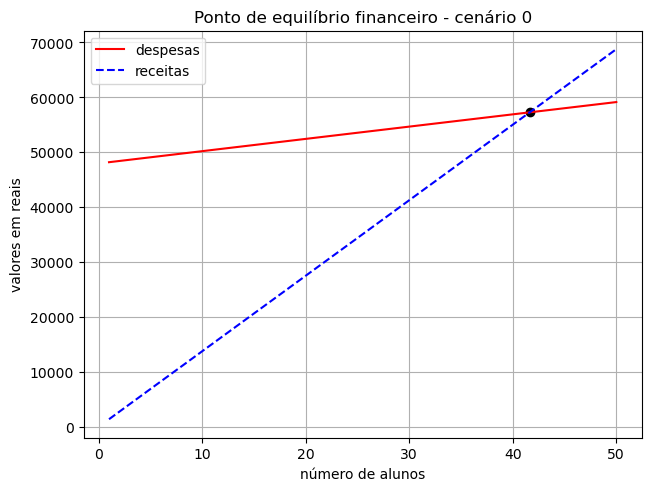

In [58]:
# Cenário 0

n = np.arange(1,51,1)
plt.figure(layout='constrained')

plt.scatter(n_0,
   n_0* mensalidade_media,
    color='black')

plt.plot(n,
    coef_ang_cenario_0*n+coef_linear_base,
    color='red',label='despesas')

plt.plot(n,
    n*mensalidade_media,
    color='blue', linestyle = 'dashed',label='receitas')


plt.xlabel('número de alunos')
plt.ylabel('valores em reais')
plt.title("Ponto de equilíbrio financeiro - cenário 0")
plt.legend()
plt.grid()

plt.savefig('../imagens/ponto-de-equilibrio-0.png')

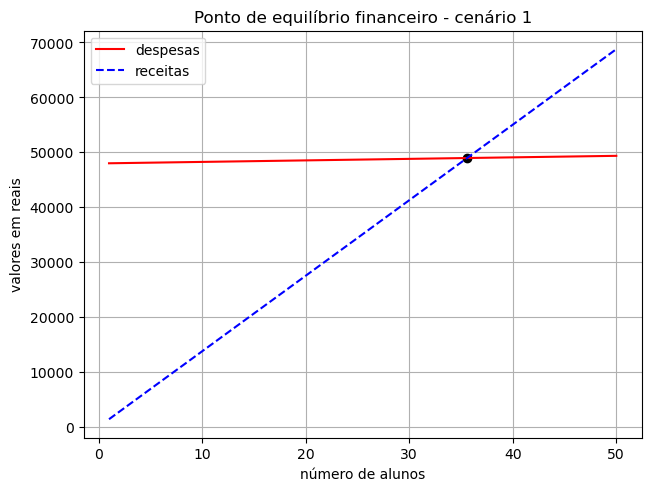

In [59]:
# Cenário 1

plt.figure(layout='constrained')

plt.scatter(n_1,
   n_1* mensalidade_media,
    color='black')

plt.plot(n,
    coef_ang_cenario_1*n+coef_linear_base,
    color='red',label='despesas')

plt.plot(n,
    n*mensalidade_media,
    color='blue', linestyle = 'dashed',label='receitas')


plt.xlabel('número de alunos')
plt.ylabel('valores em reais')
plt.title("Ponto de equilíbrio financeiro - cenário 1")
plt.legend()
plt.grid()

plt.savefig('../imagens/ponto-de-equilibrio-1.png')

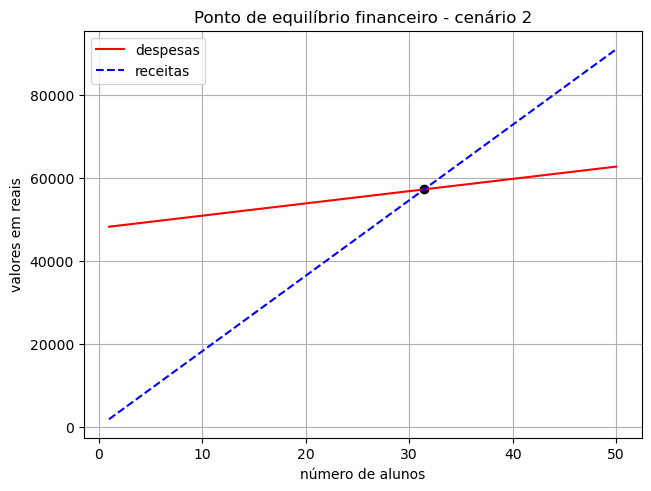

In [60]:
# Cenário 2

plt.figure(layout='constrained')

plt.scatter(n_2,
   n_2* mensalidade_media_tabelada,
    color='black')

plt.plot(n,
    coef_ang_cenario_2*n+coef_linear_base,
    color='red',label='despesas')

plt.plot(n,
    n*mensalidade_media_tabelada,
    color='blue', linestyle = 'dashed',label='receitas')


plt.xlabel('número de alunos')
plt.ylabel('valores em reais')
plt.title("Ponto de equilíbrio financeiro - cenário 2")
plt.legend()
plt.grid()

plt.savefig('../imagens/ponto-de-equilibrio-2.png')

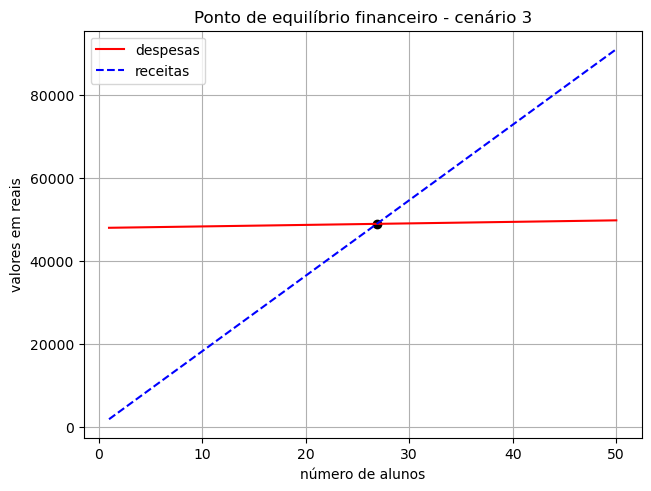

In [61]:
# Cenário 3

plt.figure(layout='constrained')

plt.scatter(n_3,
   n_3* mensalidade_media_tabelada,
    color='black')

plt.plot(n,
    coef_ang_cenario_3*n+coef_linear_base,
    color='red',label='despesas')

plt.plot(n,
    n*mensalidade_media_tabelada,
    color='blue', linestyle = 'dashed',label='receitas')


plt.xlabel('número de alunos')
plt.ylabel('valores em reais')
plt.title("Ponto de equilíbrio financeiro - cenário 3")
plt.legend()
plt.grid()

plt.savefig('../imagens/ponto-de-equilibrio-3.png')

## Comparação entre receitas e despesas

Para comparar melhor as receitas e despesas da escola, vamos fazer alguns gráficos de barras.

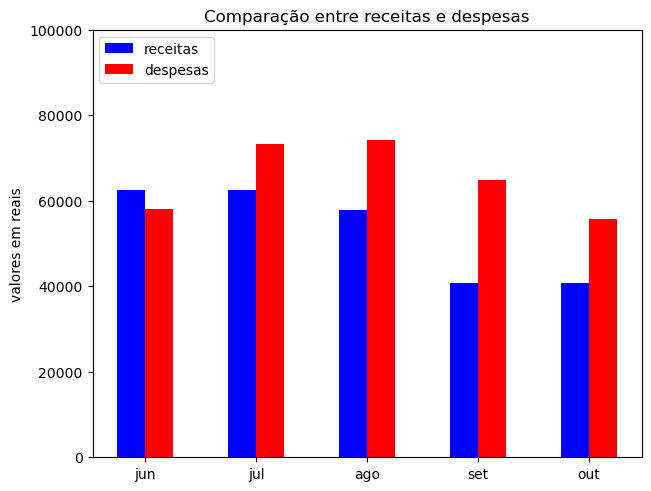

In [62]:
# Comparação entre receitas e despesas mês a mês
meses = ('jun', 'jul', 'ago', 'set', 'out')
receitas_e_despesas = {
    'receitas': receitas['valores'],
    'despesas': despesas['valores'],
}

cores = {'receitas': 'blue', 'despesas': 'red'}

x = np.arange(len(meses))
largura = 0.25
passo = 0.5

fig, ax = plt.subplots(layout='constrained')

for tipo, valores in receitas_e_despesas.items():
    offset = largura * passo
    rects = ax.bar(x + offset, valores, largura, label=tipo, color=cores[tipo])
    passo += 1

ax.set_ylabel('valores em reais')
ax.set_title('Comparação entre receitas e despesas')
ax.set_xticks(x + largura, meses)

ax.set_ylim(0, 100000)

ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/comparacao.png')

Incluindo os valores médios e as mensalidades tabeladas:

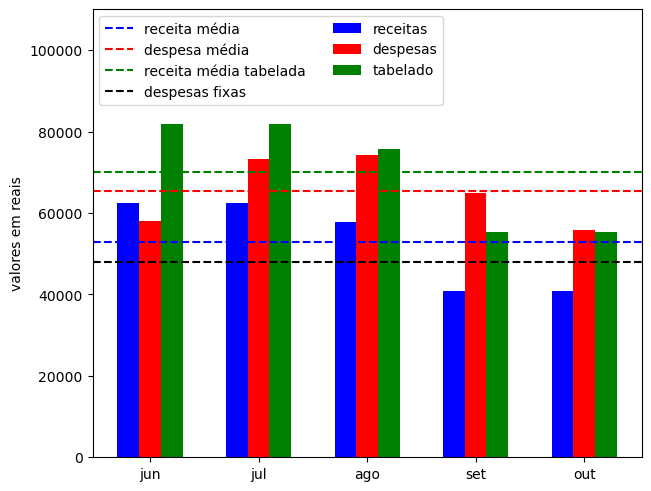

In [63]:
# Comparação entre receitas e despesas mês a mês
meses = ('jun', 'jul', 'ago', 'set', 'out')
receitas_e_despesas = {
    'receitas': receitas['valores'],
    'despesas': despesas['valores'],
    'tabelado': receitas['tabelado']
}

cores = {'receitas': 'blue', 'despesas': 'red', 'tabelado': 'green'}

x = np.arange(len(meses))
largura = 0.2
passo = 0

fig, ax = plt.subplots(layout='constrained')

ax.axhline(receitas['valores'].mean(), color='blue', linestyle='dashed', label='receita média')
ax.axhline(despesas['valores'].mean(), color='red', linestyle='dashed', label='despesa média')
ax.axhline(receitas['tabelado'].mean(), color='green', linestyle='dashed', label='receita média tabelada')
ax.axhline(coef_linear_base, color='black', linestyle='dashed', label='despesas fixas')

for tipo, valores in receitas_e_despesas.items():
    offset = largura * passo
    rects = ax.bar(x + offset, valores, largura, label=tipo, color=cores[tipo])
    passo += 1

ax.set_ylabel('valores em reais')
# ax.set_title('Comparação entre receitas e despesas')
ax.set_xticks(x + largura, meses)

ax.set_ylim(0, 110000)

ax.legend(loc='upper left', ncols=2)

fig.savefig('../imagens/comparacao-medias.png')

Olhando receitas e despesas para os cenários hipotéticos estudados (os valores se referem aos 5 meses estudados somados):

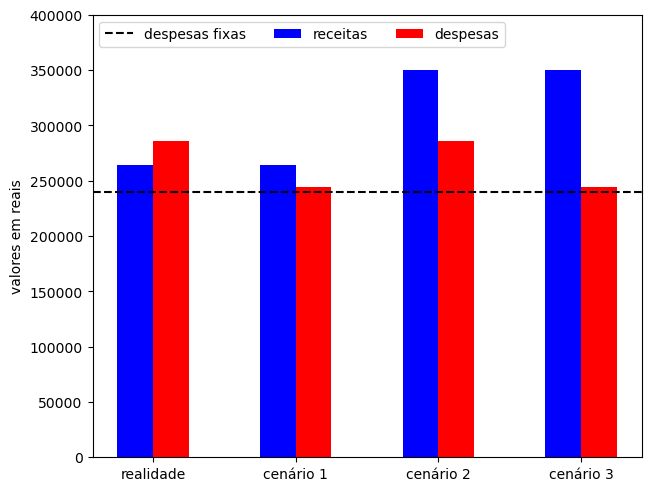

In [67]:
meses = ('realidade', 'cenário 1', 'cenário 2', 'cenário 3')
receitas_e_despesas = {
    'receitas': 5*cenarios['<R>'],
    'despesas': 5*cenarios['<D>'],
}

cores = {'receitas': 'blue', 'despesas': 'red'}

x = np.arange(len(meses))
largura = 0.25
passo = 0.5

fig, ax = plt.subplots(layout='constrained')

ax.axhline(5*coef_linear_base, color='black', linestyle='dashed', label='despesas fixas')

for tipo, valores in receitas_e_despesas.items():
    offset = largura * passo
    rects = ax.bar(x + offset, valores, largura, label=tipo, color=cores[tipo])
    passo += 1

ax.set_ylabel('valores em reais')
# ax.set_title('Comparação entre receitas e despesas')
ax.set_xticks(x + largura, meses)

ax.set_ylim(0, 400000)

ax.legend(loc='upper left', ncols=3)

fig.savefig('../imagens/cenarios.png')

Vemos claramente que seguir a tabela de mensalidades ou evitar gastos desnecessários e impensados poderia ter evitado muitos problemas na escola. A combinação dos dois erros foi deteminante para o prejuízo financeiro.

Salvando alguns arquivos úteis

In [65]:
despesas.to_csv('C:/Users/barba/Desktop/git hub/calculo-de-mensalidade/dados/despesas_2023.csv',index=False)
plano.to_csv('C:/Users/barba/Desktop/git hub/calculo-de-mensalidade/dados/plano_2023.csv',index=False)
comp.to_csv('C:/Users/barba/Desktop/git hub/calculo-de-mensalidade/dados/mens_ago.csv')